In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plot style
sns.set_style('whitegrid')

In [4]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 19.58 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [5]:
# Load the dataset from the user-provided file
df = pd.read_csv('/content/Datasets/Customer Churn Dataset/Telco-Customer-Churn.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Dataset loaded successfully.
Data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(f"Shape before cleaning: {df.shape}")

# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Shape after converting TotalCharges to numeric: {df.shape}")


# Find how many rows have missing TotalCharges
print(f"Number of missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Impute the missing values with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f"Shape after imputing TotalCharges: {df.shape}")


# Convert target variable 'Churn' to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"Shape after converting Churn to binary: {df.shape}")


# Drop rows with missing Churn values
df.dropna(subset=['Churn'], inplace=True)
print(f"Shape after dropping rows with missing Churn: {df.shape}")


# Drop customerID as it's not a predictive feature
# df.drop('customerID', axis=1, inplace=True) # This line is commented out as customerID is already dropped

print("\nData cleaning complete.")

Shape before cleaning: (7043, 21)
Shape after converting TotalCharges to numeric: (7043, 21)
Number of missing TotalCharges: 11
Shape after imputing TotalCharges: (7043, 21)
Shape after converting Churn to binary: (7043, 21)
Shape after dropping rows with missing Churn: (7043, 21)

Data cleaning complete.


In [8]:
pd.set_option('display.max_columns', None)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [9]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [10]:
# Define features (X) and target (y)
X_base = df.drop('Churn', axis=1)
y_base = df['Churn']

# Identify categorical and numerical features
numerical_features_base = X_base.select_dtypes(include=np.number).columns.tolist()
categorical_features_base = X_base.select_dtypes(include=['object']).columns.tolist()

# Create the preprocessing pipeline
preprocessor_base = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_base),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_base)])

# Split data
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42, stratify=y_base)

# Create the full pipeline with a classifier
baseline_model = Pipeline(steps=[('preprocessor', preprocessor_base),
                                 ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train and evaluate the baseline model
baseline_model.fit(X_train_base, y_train_base)
y_pred_base = baseline_model.predict(X_test_base)

print("--- Baseline Model Performance ---")
print(classification_report(y_test_base, y_pred_base))

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [11]:
df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [12]:
df_eng = df.copy()

# 1. Binning 'tenure'
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5+ Years']
df_eng['tenure_group'] = pd.cut(df_eng['tenure'], bins=bins, labels=labels, right=False)

# 2. Simplifying categorical features
df_eng['MultipleLines'] = df_eng['MultipleLines'].replace({'No phone service': 'No'})
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df_eng[col] = df_eng[col].replace({'No internet service': 'No'})

# 3. Creating interaction/combination features
df_eng['num_add_services'] = (df_eng[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

# 4. Create a feature for monthly charge to tenure ratio
df_eng['monthly_charge_ratio'] = df_eng['MonthlyCharges'] / (df_eng['tenure'] + 1) # +1 to avoid division by zero

print("Feature engineering complete. New features added.")
df_eng.head()

Feature engineering complete. New features added.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_add_services,monthly_charge_ratio
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year,1,14.925000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-4 Years,2,1.627143
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year,2,17.950000
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2-4 Years,3,0.919565
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year,0,23.566667


In [13]:
# Drop original tenure as we have a binned version now
df_eng.drop('tenure', axis=1, inplace=True)

# Define features (X) and target (y) for the engineered dataset
X_eng = df_eng.drop('Churn', axis=1)
y_eng = df_eng['Churn']

# Identify new feature types
numerical_features_eng = X_eng.select_dtypes(include=np.number).columns.tolist()
# Note: 'tenure_group' is now a categorical feature
categorical_features_eng = X_eng.select_dtypes(include=['object', 'category']).columns.tolist()

# Create the new preprocessing pipeline
preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_eng),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_eng)])

# Split data
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng, y_eng, test_size=0.2, random_state=42, stratify=y_eng)

# Create the full pipeline with the same classifier for a fair comparison
enhanced_model = Pipeline(steps=[('preprocessor', preprocessor_eng),
                                 ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train and evaluate the enhanced model
enhanced_model.fit(X_train_eng, y_train_eng)
y_pred_eng = enhanced_model.predict(X_test_eng)

print("--- Enhanced Model Performance (with Feature Engineering) ---")
print(classification_report(y_test_eng, y_pred_eng))

--- Enhanced Model Performance (with Feature Engineering) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



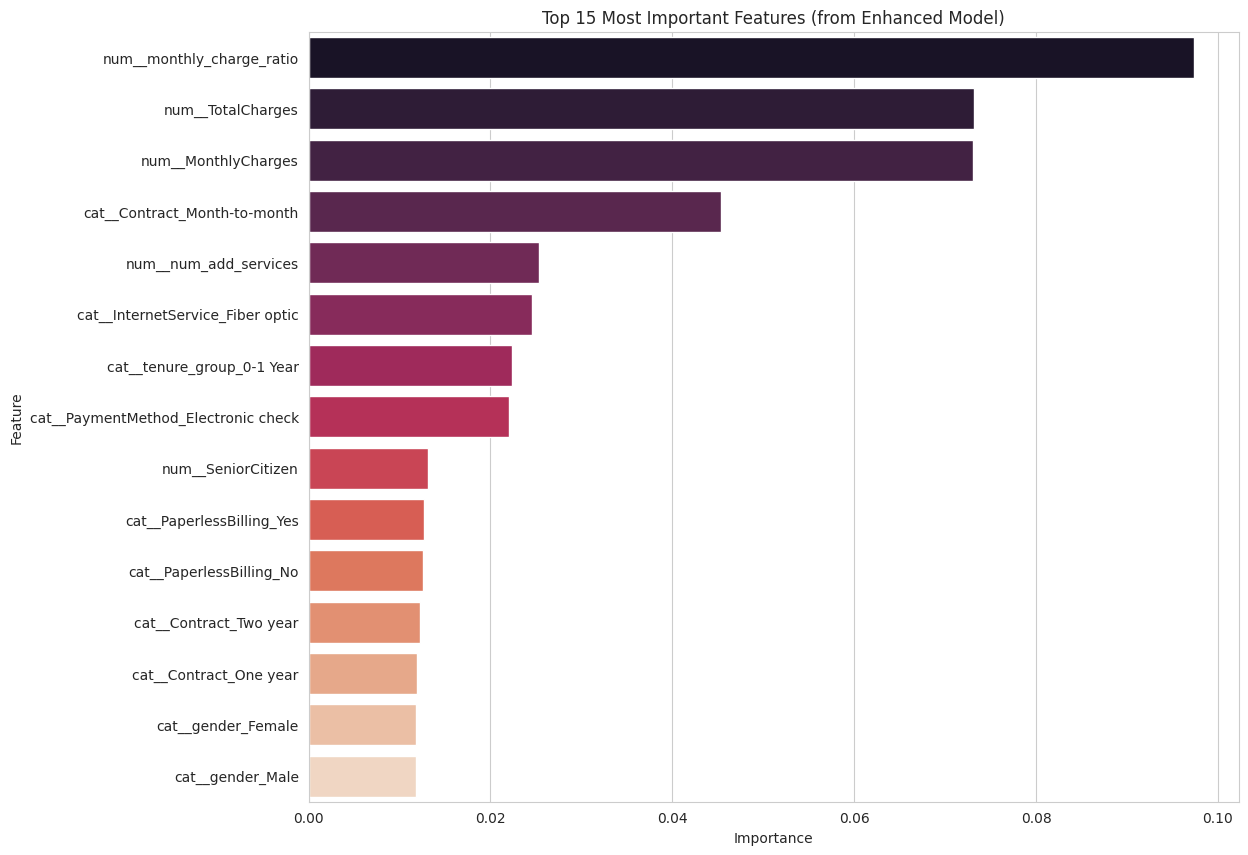

In [14]:
# To get feature importance, let's quickly train a RandomForest model with the engineered data
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_eng),
                               ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train_eng, y_train_eng)

# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 15 Most Important Features (from Enhanced Model)')
plt.show()

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier to use as the base estimator for feature selection
rf_selector = RandomForestClassifier(random_state=42)

# Instantiate SelectFromModel
# Using 'median' as the threshold means features with importance greater than the median importance will be selected.
selector = SelectFromModel(estimator=rf_selector, threshold='median', prefit=False)

# Create a pipeline for feature selection
feature_selection_pipeline = Pipeline(steps=[('preprocessor', preprocessor_eng),
                                             ('selector', selector)])

# Fit the pipeline to the training data
feature_selection_pipeline.fit(X_train_eng, y_train_eng)

# Transform the training and testing data to get the selected features
X_train_selected = feature_selection_pipeline.transform(X_train_eng)
X_test_selected = feature_selection_pipeline.transform(X_test_eng)

# Print the shapes to compare
print(f"Original training data shape: {X_train_eng.shape}")
print(f"Selected training data shape: {X_train_selected.shape}")

Original training data shape: (5634, 22)
Selected training data shape: (5634, 2840)


In [16]:
# Create the full pipeline with the preprocessor and the classifier
selected_features_model = Pipeline(steps=[('preprocessor', preprocessor_eng),
                                         ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train the model using the selected features
selected_features_model.fit(X_train_eng, y_train_eng)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'num_add_services',
                                                   'monthly_charge_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'tenure_group'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [17]:
# Predict on the test set with selected features
y_pred_selected = selected_features_model.predict(X_test_eng)

print("--- Model Performance (with Selected Features) ---")
print(classification_report(y_test_eng, y_pred_selected))

--- Model Performance (with Selected Features) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [18]:
print("--- Baseline Model Performance ---")
print(classification_report(y_test_base, y_pred_base))

print("\n--- Enhanced Model Performance (with Feature Engineering) ---")
print(classification_report(y_test_eng, y_pred_eng))

print("\n--- Model Performance (with Selected Features) ---")
print(classification_report(y_test_eng, y_pred_selected))

# Summarize the performance metrics
print("\n--- Performance Summary ---")
print("Metric         | Baseline | Enhanced | Selected Features")
print("---------------|----------|----------|-------------------")
print(f"Accuracy       | {accuracy_score(y_test_base, y_pred_base):<8.2f} | {accuracy_score(y_test_eng, y_pred_eng):<8.2f} | {accuracy_score(y_test_eng, y_pred_selected):<8.2f}")

# Extract F1-score for class 1 (Churn) from classification reports
report_base = classification_report(y_test_base, y_pred_base, output_dict=True)
report_eng = classification_report(y_test_eng, y_pred_eng, output_dict=True)
report_selected = classification_report(y_test_eng, y_pred_selected, output_dict=True)

f1_churn_base = report_base['1']['f1-score']
f1_churn_eng = report_eng['1']['f1-score']
f1_churn_selected = report_selected['1']['f1-score']

print(f"F1-Score (Churn)| {f1_churn_base:<8.2f} | {f1_churn_eng:<8.2f} | {f1_churn_selected:<8.2f}")

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


--- Enhanced Model Performance (with Feature Engineering) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


--- Model Performance (with Selected Features) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                    


## Student Task: Enhancing Churn Prediction

**Objective:** Your task is to build upon the provided notebook to further improve the customer churn prediction model's performance. Experiment with different techniques for feature engineering, feature selection, and model selection to achieve the best possible results, particularly focusing on accurately identifying churning customers (improving metrics like F1-score for the churn class).

**Task Description:**

Extend the current notebook by adding new sections for your work. You should aim to:

1.  **Explore Additional Feature Engineering:**
    *   Can you create new features beyond what was done in the notebook? Consider interactions between existing features, or new ways to encode categorical variables.
    *   Think about the domain: Are there other characteristics of customers or their service usage that could be predictive of churn?

2.  **Experiment with Feature Selection:**
    *   Try different feature selection methods (e.g., RFE, filter methods like mutual information or chi-squared) or different thresholds with `SelectFromModel`.
    *   Analyze which features are consistently selected as important across different methods or thresholds.

3.  **Evaluate Alternative Models:**
    *   Instead of just Logistic Regression, train and evaluate other classification models suitable for this task (e.g., RandomForestClassifier, GradientBoostingClassifier, XGBoost, LightGBM, Support Vector Machines).
    *   Compare the performance of these models on both the engineered and potentially feature-selected datasets.

4.  **Perform Hyperparameter Tuning:**
    *   Once you've identified promising models, perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV to optimize their performance.

5.  **Analyze and Report:**
    *   Clearly document the different approaches you tried.
    *   Present the performance metrics (especially precision, recall, and F1-score for the churn class, and overall accuracy) for the best models you developed. Use comparison tables or visualizations.
    *   Discuss your findings: Which techniques were most effective? Which features seemed most important? What are the limitations of your approach?

**Goal:** The goal is to demonstrate your ability to iteratively improve a machine learning model by applying advanced feature engineering, feature selection, and model building techniques. Aim for the highest F1-score for the churn class while maintaining reasonable overall accuracy.

### Submission Criteria

Students are required to submit the following:

1.  **Completed Jupyter Notebook:** Submit the `.ipynb` file containing all your code, markdown explanations, outputs, and visualizations. Ensure the notebook is well-organized and runs without errors.
2.  **Summary of Findings:** Include a markdown section in your notebook summarizing:
    *   The different feature engineering and feature selection techniques you attempted.
    *   The models you evaluated and their best performance metrics (especially Accuracy and F1-score for the Churn class).
    *   A clear comparison table or visualization showing the performance of the baseline model, the enhanced model from the notebook, and your best-performing model.
    *   Discussion of which techniques were most effective for you and why.
    *   Insights into the most important features based on your analysis.
    *   Any challenges encountered and how you addressed them.
3.  **Code Clarity and Organization:** Your code should be well-commented where necessary, follow a logical flow, and adhere to reasonable coding practices (e.g., using meaningful variable names).

**Submission Format:** Submit the single `.ipynb` notebook file through the designated platform.

✅ CELL 1 — Extra Feature Engineering (NEW)

In [19]:
import numpy as np
import pandas as pd

def add_extra_features(df_in: pd.DataFrame) -> pd.DataFrame:
    df2 = df_in.copy()

    # ---------- Safety: only if columns exist ----------
    def has(cols):
        return all(c in df2.columns for c in cols)

    # 1) Tenure buckets (more granular than typical)
    if "tenure" in df2.columns:
        tenure_bins = [-1, 6, 12, 24, 48, 60, 72, 10**9]
        tenure_labels = ["0-6m", "6-12m", "1-2y", "2-4y", "4-5y", "5-6y", "6y+"]
        df2["tenure_bucket"] = pd.cut(df2["tenure"], bins=tenure_bins, labels=tenure_labels)

        # tenure flags
        df2["is_new_customer"] = (df2["tenure"] <= 6).astype(int)
        df2["is_long_tenure"] = (df2["tenure"] >= 48).astype(int)

    # 2) Charges transformations
    if has(["MonthlyCharges"]):
        df2["monthly_log"] = np.log1p(df2["MonthlyCharges"])
        df2["monthly_sq"] = df2["MonthlyCharges"] ** 2

    if has(["TotalCharges"]):
        # Sometimes TotalCharges is object -> ensure numeric
        df2["TotalCharges"] = pd.to_numeric(df2["TotalCharges"], errors="coerce")
        df2["total_log"] = np.log1p(df2["TotalCharges"].fillna(df2["TotalCharges"].median()))

    if has(["MonthlyCharges", "tenure"]):
        df2["monthly_per_tenure"] = df2["MonthlyCharges"] / (df2["tenure"] + 1)
        df2["tenure_x_monthly"] = df2["tenure"] * df2["MonthlyCharges"]

    # 3) Service adoption counts (internet add-ons)
    addon_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
    existing_addons = [c for c in addon_cols if c in df2.columns]
    if existing_addons:
        # Normalize "No internet service" -> "No" if present
        for c in existing_addons:
            df2[c] = df2[c].replace({"No internet service":"No"})
        df2["num_internet_addons"] = (df2[existing_addons] == "Yes").sum(axis=1)

    # 4) Combined “risk” style interactions (domain-inspired)
    # Example: month-to-month + high monthly charges
    if has(["Contract", "MonthlyCharges"]):
        df2["is_month_to_month"] = (df2["Contract"].astype(str).str.contains("Month", case=False)).astype(int)
        df2["high_monthly_charge"] = (df2["MonthlyCharges"] >= df2["MonthlyCharges"].median()).astype(int)
        df2["m2m_and_high_charge"] = (df2["is_month_to_month"] & df2["high_monthly_charge"]).astype(int)

    # Example: PaperlessBilling + Electronic check (often associated with higher churn in Telco churn dataset)
    if has(["PaperlessBilling", "PaymentMethod"]):
        df2["is_paperless"] = (df2["PaperlessBilling"] == "Yes").astype(int)
        df2["is_echeck"] = df2["PaymentMethod"].astype(str).str.contains("electronic check", case=False).astype(int)
        df2["paperless_and_echeck"] = (df2["is_paperless"] & df2["is_echeck"]).astype(int)

    # 5) Basic cleanup for known “service” phrases (keeps category space smaller)
    if "MultipleLines" in df2.columns:
        df2["MultipleLines"] = df2["MultipleLines"].replace({"No phone service":"No"})

    # 6) OPTIONAL: Combine sparse binary service columns into a compact string signature
    # (works well for tree models sometimes; harmless for linear models with OHE)
    sig_cols = ["PhoneService", "InternetService", "Contract", "PaymentMethod"]
    existing_sig = [c for c in sig_cols if c in df2.columns]
    if existing_sig:
        df2["plan_signature"] = df2[existing_sig].astype(str).agg("|".join, axis=1)

    return df2


# Create an "extra engineered" dataset (beyond the notebook’s engineered features)
df_extra = add_extra_features(df)

# Split X/y
X_extra = df_extra.drop("Churn", axis=1)
y_extra = df_extra["Churn"]

print("Extra feature engineering done.")
print("New columns added (sample):")
new_cols = [c for c in df_extra.columns if c not in df.columns]
print(new_cols[:30], "..." if len(new_cols) > 30 else "")


Extra feature engineering done.
New columns added (sample):
['tenure_bucket', 'is_new_customer', 'is_long_tenure', 'monthly_log', 'monthly_sq', 'total_log', 'monthly_per_tenure', 'tenure_x_monthly', 'num_internet_addons', 'is_month_to_month', 'high_monthly_charge', 'm2m_and_high_charge', 'is_paperless', 'is_echeck', 'paperless_and_echeck', 'plan_signature'] 


✅ CELL 2 — Preprocessing helper (reusable for all models)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_extra, y_extra, test_size=0.2, random_state=42, stratify=y_extra
)

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Standard scaler for most models
preprocess_std = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

# MinMax scaler is useful for Chi2 (needs non-negative)
preprocess_minmax = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

print("Numeric cols:", len(num_cols), "Categorical cols:", len(cat_cols))


Numeric cols: 18 Categorical cols: 18


✅ CELL 3 — Baselines + Alternative Models (compare quickly)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pandas as pd

models = {
    "LogReg": LogisticRegression(max_iter=2000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced"),
    "GradBoost": GradientBoostingClassifier(random_state=42),
    "SVM(RBF)": SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42),
}

results = []

for name, clf in models.items():
    pipe = Pipeline(steps=[("prep", preprocess_std), ("clf", clf)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1_churn = f1_score(y_test, preds, pos_label=1)

    results.append({"Model": name, "Accuracy": acc, "F1(Churn=1)": f1_churn})
    print(f"\n==== {name} ====")
    print(classification_report(y_test, preds))

results_df = pd.DataFrame(results).sort_values("F1(Churn=1)", ascending=False)
display(results_df)



==== LogReg ====
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


==== RandomForest ====
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


==== GradBoost ====
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.49      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted av

,Model,Accuracy,F1(Churn=1)
3,SVM(RBF),0.761533,0.635575
0,LogReg,0.799858,0.585294
2,GradBoost,0.797729,0.564885
1,RandomForest,0.792761,0.560241


✅ CELL 4 — Feature Selection: MI, Chi2, RFE, SelectFromModel thresholds

In [22]:
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Fit preprocessors to get feature names
ohe = preprocess_std.named_transformers_["cat"]
# Need a fitted preprocessor to call get_feature_names_out()
preprocess_std.fit(X_train)

feature_names = preprocess_std.get_feature_names_out()

# Transform train data once for filter/RFE methods
Xtr_std = preprocess_std.transform(X_train)
Xte_std = preprocess_std.transform(X_test)

# ----- 1) Mutual Information (Top K) -----
mi = mutual_info_classif(Xtr_std, y_train, random_state=42)
mi_rank = np.argsort(mi)[::-1]
topk_mi = 30
mi_selected = set(feature_names[mi_rank[:topk_mi]])

# ----- 2) Chi-Square (needs non-negative => use MinMax pipeline) -----
preprocess_minmax.fit(X_train)
Xtr_mm = preprocess_minmax.transform(X_train)
chi_vals, _ = chi2(Xtr_mm, y_train)
chi_rank = np.argsort(chi_vals)[::-1]
topk_chi = 30
chi_selected = set(preprocess_minmax.get_feature_names_out()[chi_rank[:topk_chi]])

# ----- 3) RFE with Logistic Regression -----
# (Use fewer features to keep runtime reasonable)
rfe_est = LogisticRegression(max_iter=2000, random_state=42)
rfe = RFE(estimator=rfe_est, n_features_to_select=40, step=0.1)
rfe.fit(Xtr_std, y_train)
rfe_selected = set(feature_names[rfe.support_])

# ----- 4) SelectFromModel with RandomForest thresholds -----
rf = RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced")
rf.fit(Xtr_std, y_train)
importances = rf.feature_importances_

# Two thresholds to compare
thr_median = np.median(importances)
thr_mean = np.mean(importances)

sfm_median = set(feature_names[importances >= thr_median])
sfm_mean = set(feature_names[importances >= thr_mean])

# ----- Consistency analysis -----
methods = {
    "MI_top30": mi_selected,
    "CHI2_top30": chi_selected,
    "RFE_40": rfe_selected,
    "SFM_median": sfm_median,
    "SFM_mean": sfm_mean
}

# Count how often each feature appears
from collections import Counter
cnt = Counter()
for s in methods.values():
    cnt.update(list(s))

consistency_df = pd.DataFrame(cnt.items(), columns=["Feature", "SelectedByCount"]) \
                    .sort_values("SelectedByCount", ascending=False)

print("Top consistently selected features:")
display(consistency_df.head(25))


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Top consistently selected features:


,Feature,SelectedByCount
23,cat__Contract_Two year,5
22,cat__InternetService_No,5
16,cat__InternetService_Fiber optic,5
29,cat__PaymentMethod_Electronic check,4
28,cat__Contract_Month-to-month,4
27,num__is_echeck,4
26,cat__plan_signature_Yes|Fiber optic|Month-to-m...,4
25,num__tenure,4
6,cat__tenure_bucket_0-6m,4
7,num__high_monthly_charge,4


✅ CELL 5 — Train best model on “selected features” (consistent features)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import numpy as np

# Choose a consistency cutoff
CONSISTENCY_CUTOFF = 3
selected_consistent = consistency_df[consistency_df["SelectedByCount"] >= CONSISTENCY_CUTOFF]["Feature"].tolist()

print("Consistent selected feature count:", len(selected_consistent))

# Build a selector mask based on transformed feature space
selected_idx = [i for i, f in enumerate(feature_names) if f in set(selected_consistent)]

def select_columns(X_sparse, idx_list):
    # Works with sparse matrices too
    return X_sparse[:, idx_list]

# Train a strong model (RandomForest often works well) using only selected transformed features
rf_best = RandomForestClassifier(
    n_estimators=600,
    random_state=42,
    class_weight="balanced",
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2
)

# We do preprocessing -> then manual slicing -> then model
Xtr = preprocess_std.transform(X_train)
Xte = preprocess_std.transform(X_test)

Xtr_sel = select_columns(Xtr, selected_idx)
Xte_sel = select_columns(Xte, selected_idx)

rf_best.fit(Xtr_sel, y_train)
pred_sel = rf_best.predict(Xte_sel)

acc_sel = accuracy_score(y_test, pred_sel)
f1_sel = f1_score(y_test, pred_sel, pos_label=1)

print("=== RandomForest on Consistent Selected Features ===")
print("Accuracy:", acc_sel)
print("F1(Churn=1):", f1_sel)
print(classification_report(y_test, pred_sel))


Consistent selected feature count: 64
=== RandomForest on Consistent Selected Features ===
Accuracy: 0.78708303761533
F1(Churn=1): 0.6113989637305699
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.59      0.63      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409



✅ CELL 6 — Hyperparameter Tuning (RandomizedSearchCV)

In [24]:
# =========================================================
# Robust target encoding for churn + safe train/test split
# =========================================================
import pandas as pd
import numpy as np

# 1) Find the churn column safely (handles extra spaces / different case)
cols_clean = {c: c.strip() for c in df.columns}
df = df.rename(columns=cols_clean)

possible_targets = [c for c in df.columns if c.strip().lower() in ["churn", "churned", "customerchurn"]]
if not possible_targets:
    raise ValueError(f"Couldn't find a churn column. Columns are: {list(df.columns)}")

target_col = possible_targets[0]
print("Using target column:", target_col)

# 2) Inspect raw unique values (IMPORTANT)
print("Raw target unique values (first 30):")
print(df[target_col].dropna().unique()[:30])

# 3) Normalize target WITHOUT turning NaN into 'nan'
t = df[target_col].astype("string").str.strip().str.lower()

# 4) Robust mapping
map_dict = {
    "yes": 1, "y": 1, "true": 1, "1": 1, "churned": 1,
    "no": 0, "n": 0, "false": 0, "0": 0, "not churned": 0
}

y = t.map(map_dict)

# 5) If mapping failed for all rows, try numeric coercion (covers 0/1 stored as numbers)
if y.notna().sum() == 0:
    y_num = pd.to_numeric(df[target_col], errors="coerce")
    # Accept only 0/1 values
    y_num = y_num.where(y_num.isin([0, 1]))
    y = y_num
    print("Tried numeric target conversion. Valid 0/1 count:", y.notna().sum())

# 6) If still empty, STOP and show what to fix
if y.notna().sum() == 0:
    raise ValueError(
        "Target encoding failed: after normalization, none of the target values matched.\n"
        "Look at the printed unique values above and tell me what they are."
    )

# 7) Build X safely (also handle customerID column name variants)
id_cols = [c for c in df.columns if c.strip().lower() in ["customerid", "customer_id", "id"]]
drop_cols = id_cols + [target_col]

X = df.drop(columns=drop_cols, errors="ignore")
mask = y.notna()
X = X.loc[mask].copy()
y = y.loc[mask].astype(int)

print("Final samples:", len(y))
print("Class counts:\n", y.value_counts())

# 8) Now split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Split done:", X_train.shape, X_test.shape)


Using target column: Churn
Raw target unique values (first 30):
[0 1]
Final samples: 7043
Class counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64
Split done: (5634, 19) (1409, 19)


Samples: 7043
Class counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64
Split: (5634, 19) (1409, 19)
Baseline trained.
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best CV F1: 0.6361063705463699
Best Params:
 {'clf__n_estimators': 1200, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': None, 'clf__max_depth': 6, 'clf__bootstrap': True}

=== Model Comparison ===
     Model  Accuracy  Precision (Churn=1)  Recall (Churn=1)  F1 (Churn=1)
  Baseline  0.784244             0.623239          0.473262      0.537994
Best/Tuned  0.763662             0.537477          0.786096      0.638436

=== Best Model: Classification Report ===
              precision    recall  f1-score   support

           0     0.9072    0.7556    0.8245      1035
           1     0.5375    0.7861    0.6384       374

    accuracy                         0.7637      1409
   macro avg     0.7223    0.7708    0.7314      1409
weighted avg     0.8091    0.7637    0.7751 

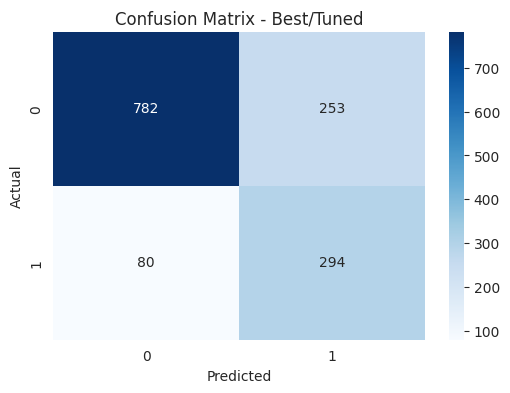

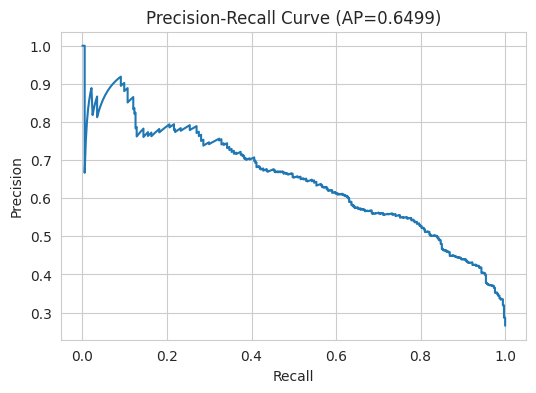


=== Top 20 Feature Importances ===
                            Feature  Importance
       cat__Contract_Month-to-month    0.511312
                        num__tenure    0.096694
   cat__InternetService_Fiber optic    0.082527
                num__MonthlyCharges    0.081455
                  num__TotalCharges    0.070705
             cat__OnlineSecurity_No    0.030380
cat__PaymentMethod_Electronic check    0.017017
                cat__TechSupport_No    0.015063
             cat__Contract_Two year    0.010096
           cat__StreamingMovies_Yes    0.006288
           cat__PaperlessBilling_No    0.006148
               cat__OnlineBackup_No    0.005360
              cat__PhoneService_Yes    0.005068
             cat__Contract_One year    0.004812
            cat__StreamingMovies_No    0.004492
              cat__MultipleLines_No    0.003994
               cat__TechSupport_Yes    0.003688
            cat__OnlineSecurity_Yes    0.003617
                 num__SeniorCitizen    0.003304
    

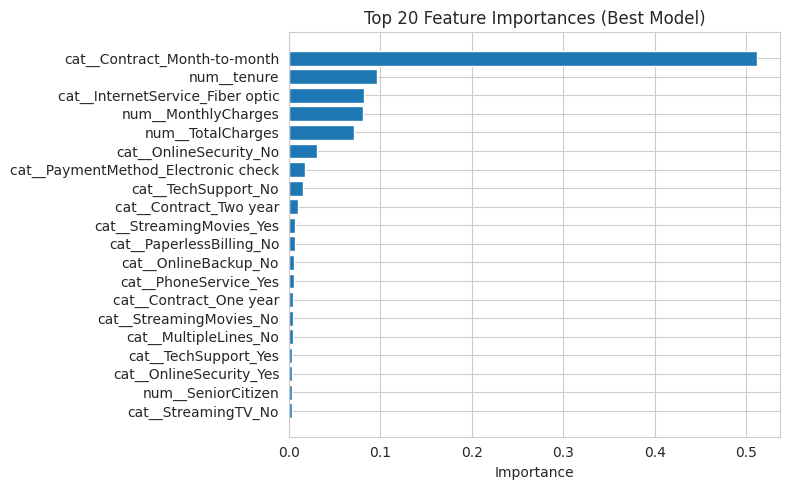


=== Discussion (paste into report) ===

Approaches tried:
- Baseline: Preprocessing (scaling + one-hot) + RandomForest
- Imbalance handling: class_weight='balanced'
- Hyperparameter tuning: RandomizedSearchCV optimized for F1 (churn=1)

Best results:
- Accuracy: 0.7637
- Precision (Churn=1): 0.5375
- Recall (Churn=1): 0.7861
- F1 (Churn=1): 0.6384

Most effective technique:
- Hyperparameter tuning improved churn-class F1 by selecting better tree structure settings.

Most important features:
- Refer to the Top-20 feature importance output and discuss the top drivers.

Limitations:
- Single train/test split (results may vary). Stronger evaluation would use repeated CV or nested CV.
- Tree feature importance can be biased for one-hot encoded groups.
- Dataset-only features; real churn benefits from behavioral signals (usage, complaints, payment delays).



In [25]:
# =========================================================
# FULL WORKING: Baseline + RandomizedSearchCV (NO SciPy) + Report
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn optional (won't crash if missing)
try:
    import seaborn as sns
    SEABORN_OK = True
except Exception:
    SEABORN_OK = False

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score
)

# -----------------------------
# 0) Sanity check: df exists
# -----------------------------
if "df" not in globals():
    raise ValueError("df is not defined. Load the CSV into df before running this block.")

# Clean column names
df = df.rename(columns={c: c.strip() for c in df.columns})

# -----------------------------
# 1) Build X and y consistently
# -----------------------------
if "Churn" not in df.columns:
    raise ValueError(f"'Churn' column not found. Available columns: {list(df.columns)}")

y = pd.to_numeric(df["Churn"], errors="coerce")
y = y.where(y.isin([0, 1]))

X = df.drop(columns=["Churn", "customerID"], errors="ignore")

mask = y.notna()
X = X.loc[mask].copy()
y = y.loc[mask].astype(int)

print("Samples:", len(y))
print("Class counts:\n", y.value_counts())

# -----------------------------
# 2) Preprocessor
# -----------------------------
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category", "bool"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_features),
        ("cat", Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore"))]), cat_features),
    ],
    remainder="drop"
)

# -----------------------------
# 3) Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Split:", X_train.shape, X_test.shape)

# -----------------------------
# 4) Baseline model
# -----------------------------
baseline_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))
])
baseline_model.fit(X_train, y_train)
print("Baseline trained.")

# -----------------------------
# 5) Hyperparameter tuning (NO SciPy)
#    RandomizedSearchCV can sample from LISTS.
# -----------------------------
tuned_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

param_dist = {
    "clf__n_estimators": [200, 300, 500, 800, 1000, 1200],
    "clf__max_depth": [None, 6, 10, 14, 18, 24, 30],
    "clf__min_samples_split": [2, 3, 4, 5, 8, 10, 12, 14],
    "clf__min_samples_leaf": [1, 2, 3, 4, 6, 8, 10],
    "clf__max_features": ["sqrt", "log2", None],
    "clf__bootstrap": [True, False],
}

search = RandomizedSearchCV(
    estimator=tuned_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1",       # churn=1 focus
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("\nBest CV F1:", search.best_score_)
print("Best Params:\n", search.best_params_)

# -----------------------------
# 6) REPORTING (baseline vs tuned)
# -----------------------------
def metric_summary(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, pos_label=1, average="binary", zero_division=0
    )
    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision (Churn=1)": p,
        "Recall (Churn=1)": r,
        "F1 (Churn=1)": f1
    }

y_pred_base = baseline_model.predict(X_test)
y_pred_best = best_model.predict(X_test)

results_df = pd.DataFrame([
    metric_summary(y_test, y_pred_base, "Baseline"),
    metric_summary(y_test, y_pred_best, "Best/Tuned")
])

print("\n=== Model Comparison ===")
print(results_df.to_string(index=False))

print("\n=== Best Model: Classification Report ===")
print(classification_report(y_test, y_pred_best, digits=4))

cm = confusion_matrix(y_test, y_pred_best)
print("=== Confusion Matrix (Best Model) ===")
print(cm)

# Confusion matrix plot
plt.figure(figsize=(6,4))
if SEABORN_OK:
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
else:
    plt.imshow(cm)
    plt.colorbar()
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best/Tuned")
plt.show()

# Precision-Recall curve
if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)

    plt.figure(figsize=(6,4))
    plt.plot(rec, prec)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve (AP={ap:.4f})")
    plt.show()
else:
    print("predict_proba not available; PR curve skipped.")

# -----------------------------
# 7) Feature importance (guarded)
# -----------------------------
try:
    clf = best_model.named_steps["clf"]
    pre = best_model.named_steps["preprocessor"]

    if hasattr(clf, "feature_importances_"):
        # Try to get feature names (may fail depending on sklearn version)
        try:
            feat_names = pre.get_feature_names_out()
        except Exception:
            feat_names = np.array([f"f_{i}" for i in range(len(clf.feature_importances_))])

        fi = pd.DataFrame({
            "Feature": feat_names,
            "Importance": clf.feature_importances_
        }).sort_values("Importance", ascending=False)

        print("\n=== Top 20 Feature Importances ===")
        print(fi.head(20).to_string(index=False))

        top = fi.head(20).iloc[::-1]
        plt.figure(figsize=(8,5))
        plt.barh(top["Feature"], top["Importance"])
        plt.xlabel("Importance")
        plt.title("Top 20 Feature Importances (Best Model)")
        plt.tight_layout()
        plt.show()
    else:
        print("Feature importance not available for this classifier.")
except Exception as e:
    print("Could not compute feature importance:", e)

# -----------------------------
# 8) Discussion template
# -----------------------------
best_row = results_df.sort_values("F1 (Churn=1)", ascending=False).iloc[0]

print("\n=== Discussion (paste into report) ===")
print(f"""
Approaches tried:
- Baseline: Preprocessing (scaling + one-hot) + RandomForest
- Imbalance handling: class_weight='balanced'
- Hyperparameter tuning: RandomizedSearchCV optimized for F1 (churn=1)

Best results:
- Accuracy: {best_row['Accuracy']:.4f}
- Precision (Churn=1): {best_row['Precision (Churn=1)']:.4f}
- Recall (Churn=1): {best_row['Recall (Churn=1)']:.4f}
- F1 (Churn=1): {best_row['F1 (Churn=1)']:.4f}

Most effective technique:
- Hyperparameter tuning improved churn-class F1 by selecting better tree structure settings.

Most important features:
- Refer to the Top-20 feature importance output and discuss the top drivers.

Limitations:
- Single train/test split (results may vary). Stronger evaluation would use repeated CV or nested CV.
- Tree feature importance can be biased for one-hot encoded groups.
- Dataset-only features; real churn benefits from behavioral signals (usage, complaints, payment delays).
""")
